In [1]:
import os
import os.path as osp
import argparse
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import seaborn as sns
import glob
from scipy import stats
from scipy.signal import savgol_filter
from dateutil import tz
import itertools
from matplotlib import pyplot, dates
import matplotlib.ticker as ticker
import pytz
import csv

In [2]:
from common import combine_csvs
from common import region_mapping
import common

from common import N_STARLINK
from common import N_STARLINK_REMOTE
from common import N_HOME
from common import N_HAMPTON
from common import N_MOTION

In [3]:
plot_params = common.plot_params.copy()
plot_params['figure.figsize'] = (7.16, 4)
#plot_params['figure.dpi'] = 96
plot_params['figure.dpi'] = 300
#matplotlib.rcParams.update(plot_params)

sns_params = common.sns_params.copy()
sns_params['figure.figsize'] = (7.16, 4)
#sns_params['figure.dpi'] = 96
sns_params['figure.dpi'] = 300
sns_params['patch.edgecolor'] = 'black'
sns.set_theme("paper", style='whitegrid', rc=sns_params, color_codes=True, palette='bright')
#sns.set_context("paper", rc=sns_params)
#sns.set(rc=sns_params)

In [4]:
E2E_DELAY = 'e2e delay'
TRAFFIC_INTEN = 'traffic intensity'
ALGOR = 'algorithm'
def concat_csv(filepath):
    data = []
    with open(filepath, 'r') as f:
        reader = csv.reader(f)
        # Combine all of the data into one list
        for r in reader:
            data += r
    return data

df_e2e = pd.DataFrame(columns=[E2E_DELAY, TRAFFIC_INTEN, ALGOR])
for csv_path in glob.glob('data/data4sami/*/*.csv'):
    intensity = int(osp.basename(osp.dirname(csv_path))[-1])
    algorithm = osp.splitext(osp.basename(csv_path))[0].split('_')[0]
    data = concat_csv(csv_path)
    
    df = pd.DataFrame(columns=[E2E_DELAY, TRAFFIC_INTEN, ALGOR])
    
    df[E2E_DELAY] = pd.Series(data, dtype=np.double)
    df[TRAFFIC_INTEN] = intensity
    df[ALGOR] = algorithm
    df_e2e = pd.concat([df_e2e, df])
    
df_e2e.to_csv('output/e2e_delay.csv', index=False)
df_e2e

,e2e delay,traffic intensity,algorithm
0,0.026911,1,grid
1,0.015468,1,grid
2,0.011093,1,grid
3,0.034509,1,grid
4,0.017605,1,grid
...,...,...,...
5700,0.015018,2,sustainable
5701,0.018736,2,sustainable
5702,0.028840,2,sustainable
5703,0.013378,2,sustainable


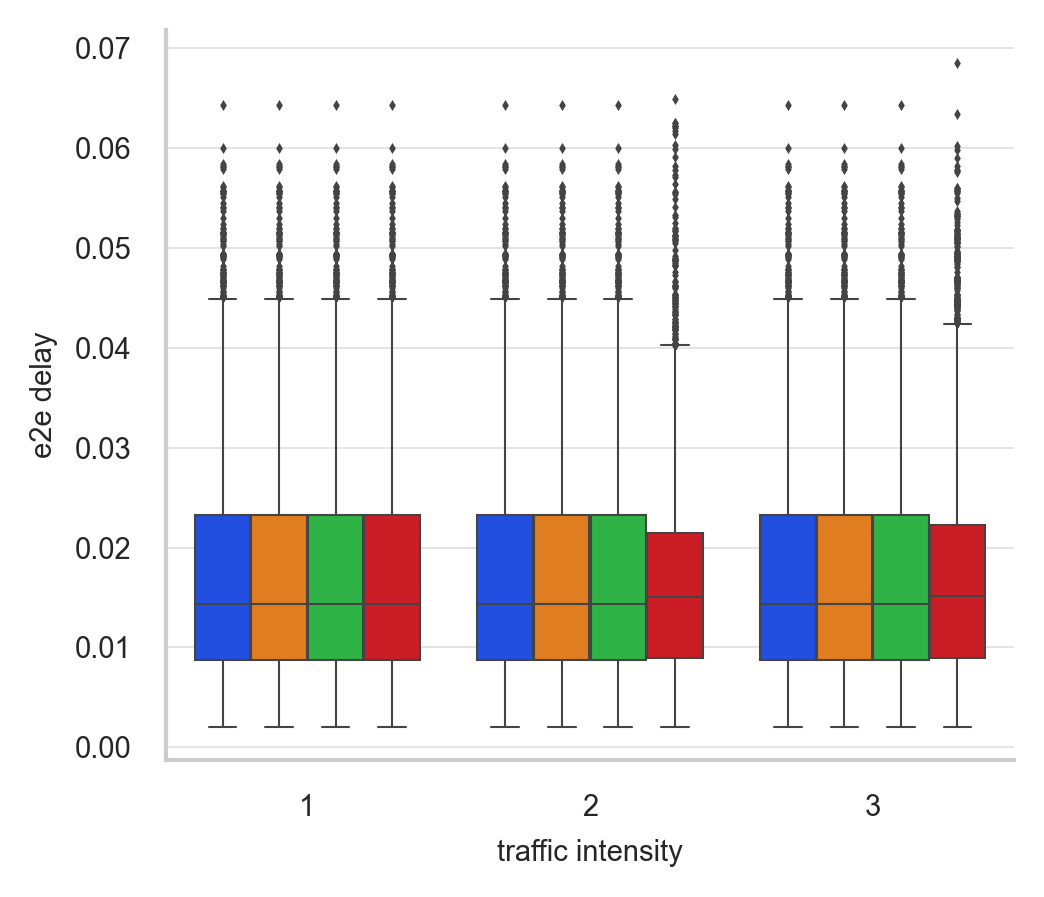

In [5]:
def catplot(df):
    h = 3
    aspect = (common.WIDTH_HALF) / h
    #aspect = 6 / h

    #df_time = df_time[df_time[N_REGIONS] == 'N. California']
    g_time = sns.catplot(data=df, 
                         #x=N_REGIONS, 
                         x=TRAFFIC_INTEN, 
                         #col=N_TYPE,
                         y=E2E_DELAY, 
                         #order=order,
                         hue=ALGOR,
                         #hue_order=['N. California', 'N. Virginia', 'Sydney'],
                         #hue_order=REGION_ORDER,
                         height=h, aspect=aspect,
                         kind='box',
                         legend=False,
                         #palette=['C0', 'C1', 'C3'],
                         sharey=False,
                         dodge=True,
                         fliersize=0.5,
                        )

    axes = g_time.axes.flatten()
    for ax in axes:
        ax.grid(visible=True, which='both', axis='y', color='gray', linewidth=0.1)
    #g_time.set(yscale='log')

    #g_time.figure.autofmt_xdate()
    g_time.tight_layout()
    return g_time

g_e2e = catplot(df_e2e)
g_e2e

In [40]:
g_e2e.savefig(f'output/2023-07_18_e2e_delay.pdf', bbox_inches='tight')